# Timeseries figure for long recording from WT c57BL/6 mouse: activity and sleep

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline
sns.set(style="white")
sns.set_context("poster")


## Import 1 month of data captured with arduino/Processing programs

In [3]:
ts_pre = pd.read_csv('../PIRdata/1monthPIRsleep.csv', parse_dates=True, index_col=0) #import data

In [4]:
ts_pre.pop('PIR2') # remove unwarnted/empty columns
ts_pre.pop('PIR4') 
ts_pre.pop('PIR5')
ts_pre.pop('PIR6')
ts_pre.pop('Device')
ts_pre.head()  # show top of dataframe

,PIR1,PIR3,LDR
Time,,,
2014-08-13 13:10:51.490,0,0,690
2014-08-13 13:11:01.496,0,0,689
2014-08-13 13:11:11.501,0,0,689
2014-08-13 13:11:21.505,0,0,691
2014-08-13 13:11:31.511,0,0,689


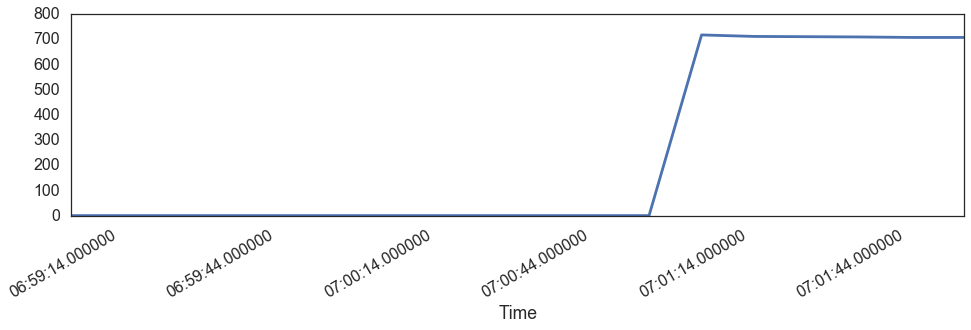

In [5]:
ts_cutLDR = ts_pre.truncate(before='2014-08-14 06:59:0', after='2014-08-14 07:02:0')  # find start of light period
ts_cutLDR['LDR'].plot(figsize=(16,4))

In [6]:
ts_sH = pd.DataFrame.tshift(ts_pre,-7, freq='H', axis=0)  # shift back 7 hours
ts = pd.DataFrame.tshift(ts_sH,-1, freq='T', axis=0) # then shift this back 1 minutes,  
# so time is aligned to lights (enviromental time)

## Define sleep as period of immobilty of 40s or more (4 x 10second bins)

In [7]:
# run through trace looking for bouts of sleep (defined as 4 or more sequential '0' values) variable 'a' is dataframe of PIR data

def sleepscan(a,bins):
    ss = a.rolling(bins).sum()
    y = ss==0
    return y.astype(int)   # if numerical output is required

In [8]:
def sleep_count(val):
    
    if val == 0:
        sleep_count.count = 0
    elif val == 1:
        sleep_count.count +=1
    return sleep_count.count
    
sleep_count.count = 0 #static variable   

In [9]:
ss = sleepscan(ts,4)
ts['count1'] =ss['PIR1'].apply(sleep_count) 
ts['count3'] =ss['PIR3'].apply(sleep_count) #new columns in dataframe
ts['InvSleep1'] = (0-ts.count1)/6 # time (minutes approx) of sleep bout
ts['InvSleep3'] = (0-ts.count3)/6

In [10]:
ss.head()


,PIR1,PIR3,LDR
Time,,,
2014-08-13 06:09:51.490,0,0,0
2014-08-13 06:10:01.496,0,0,0
2014-08-13 06:10:11.501,0,0,0
2014-08-13 06:10:21.505,1,1,0
2014-08-13 06:10:31.511,1,1,0


In [11]:
ts_cut =ts.truncate(before='2014-08-14 00:00:00.000000',after='2014-09-14 00:00:00.000000')
# ts_cut.plot(subplots=True, figsize=(24,8)) #uncomment to see plot


In [12]:
ts_week = ts.truncate(before='2014-08-28 00:00:00.000000',after='2014-09-04 00:00:00.000000')
# ts_week.plot(subplots=True, figsize=(24,8)) #uncomment to see plot

In [13]:
ts_day = ts.truncate(before='2014-08-31 00:00:00.000000',after='2014-09-01 00:00:00.000000')
# ts_day.plot(subplots=True, figsize=(24,8)) #uncomment to see plot

## Construct a figure showing 1 month, 1 week and 1 day of this data (to reveal density)

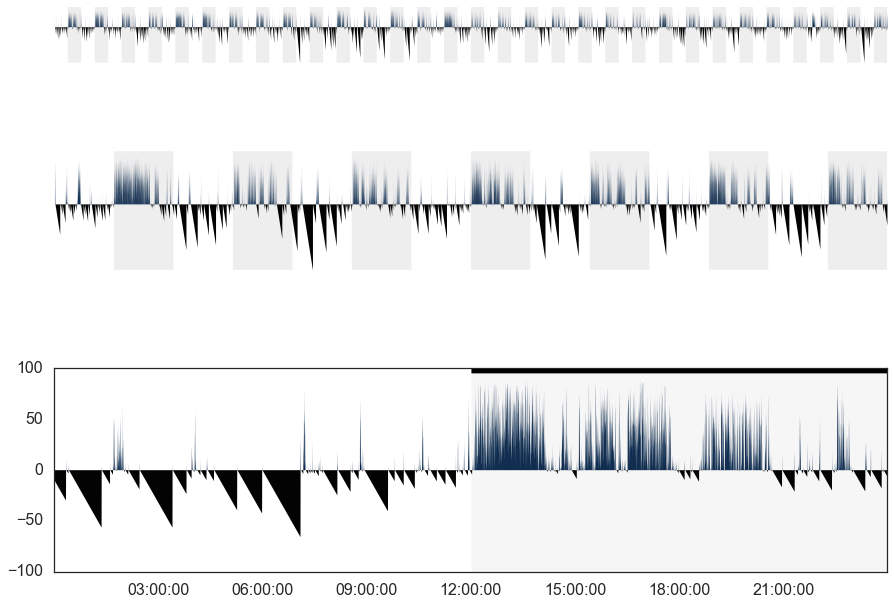

In [14]:
# setup 3 plots for 1 month, 1 week and 1 day of data

ax1 = plt.subplot2grid((9,1), (0,0), rowspan=2)
ax2 = plt.subplot2grid((9,1), (2,0), rowspan=3)
ax3 = plt.subplot2grid((9,1), (5,0), rowspan=4)

# Plot 1 month of data, showing activity, dark period of each day and periods of immobility scored as sleep (downward deflection)

ax1.fill_between(ts_cut.index, 0,ts_cut['PIR1'], label= "Activty",lw=0, facecolor='#002147') # activity
ax1.fill_between(ts_cut.index, np.min(ts_cut['InvSleep1']),100, where=ts_cut.index.hour>=12,lw=0, alpha=0.2, facecolor='#aaaaaa')
ax1.fill_between(ts_cut.index, 0,ts_cut['InvSleep1'],label= "Immobility >40sec", lw=0, facecolor="#030303")
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_frame_on(0)

# Plot 1 week of data

ax2.fill_between(ts_week.index, 0,ts_week['PIR1'], label= "Activty",lw=0, facecolor='#002147')
ax2.fill_between(ts_week.index, np.min(ts_week['InvSleep1']),100, where=ts_week.index.hour>=12,lw=0, alpha=0.2, facecolor='#aaaaaa')
ax2.fill_between(ts_week.index, 0,ts_week['InvSleep1'],label= "Immobility >40sec", lw=0, facecolor="#030303")
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_frame_on(0)

# Plot 1 day  of data, with axes

ax3.fill_between(ts_day.index, 0,ts_day['PIR1'], label= "Activty",lw=0, facecolor='#002147')
ax3.fill_between(ts_day.index, -100,100, where=ts_day.index.hour>=12,lw=0, alpha=0.1, facecolor='#aaaaaa')
ax3.fill_between(ts_day.index, 95,100, where=ts_day.index.hour>=12,lw=0, alpha=1, facecolor='#000000')
ax3.fill_between(ts_day.index, 0,ts_day['InvSleep1'],label= "Immobility >40sec", lw=0, facecolor='#030303')
ax3.set_yticks([-100,-50,0, 50,100])
ax3.set_frame_on(1)

plt.tight_layout(h_pad=4)

#Save and show the figure

plt.savefig('Month_week_day.jpg',format='jpg',transparent=True, dpi=600,pad_inches=0.2,
            frameon=2)  

plt.show()